Lannan, Myers

Populating the interactive namespace from numpy and matplotlib


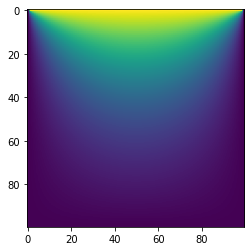

In [33]:
#finite difference method
%pylab inline
np.set_printoptions(precision=1)

L = 100
phi = 2*np.ones([L,L]) # initial guess with ones

#boundary conditions#
phi[0,:] = 100 
phi[L-1,:] = 0 
phi[:,0] = 0
phi[:,L-1] = 0
####################

phinew=np.zeros([L,L])
for c in range(0,5000): #the check for the error wasnt working so it just runs a bunch of times
  phi[0,:] = 100 
  phi[L-1,:] = 0 
  phi[:,0] = 0
  phi[:,L-1] = 0

  for j in range(1,L-1): #edges should remain the same so not iterating over those
    for i in range(1,L-1):
      phinew[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
  phi=phinew

plt.imshow(phi,  vmin=0, vmax=100)

Populating the interactive namespace from numpy and matplotlib


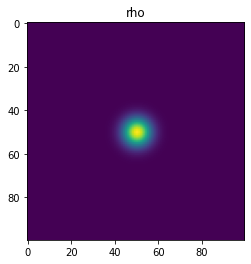

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


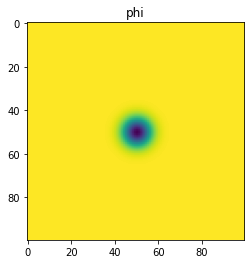

In [34]:
#fft method
%pylab inline
import sympy as sp

sigma = 20
L = 100
delta = 1 #sets scale
np.set_printoptions(precision=1)

def chargedensity(x,y):
  return np.exp(-((x-L/2)**2 +(y-L/2)**2)/2/sigma)

#generate real space charge density matrix:
rho = np.zeros([L,L])
for i in range(L):
  for j in range(L):
    rho[i,j] = chargedensity(i,j)

rhohat = np.real(np.fft.fft(rho))

#print("rho: ")
#print(rho)
#print("rhohat: ")
#print(rhohat)

plt.figure()
plt.imshow(rho)
plt.title("rho")
plt.show()

phihat = np.zeros([L,L])
for i in range(L):
  for j in range(L):
    phihat[i,j] = -4*delta**2*np.pi*rhohat[i,j]/(np.exp(-2*np.pi*1j*i) + np.exp(2*np.pi*1j*i) + np.exp(-2*np.pi*1j*j) + np.exp(2*np.pi*1j*j)-3.9999) #creates singularity if 4

phi = np.real(np.fft.fft(phihat))

#print("phi: ")
#print(phi)
#print("phihat: ")
#print(phihat)

plt.figure()
plt.imshow(phi)
plt.title("phi")
plt.show()